<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/07_ensemble_learning_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensamble Learning: Stacking

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Apply stacking for ensamble learning

## Load Dataset

In [61]:
from sklearn.datasets import make_moons

from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from graphviz import Source
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint, uniform

from copy import deepcopy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from IPython.display import Image
from pathlib import Path
import tarfile
import urllib.request
import time
import math


In [60]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Fit Classifiers

In [62]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('rfc', RandomForestClassifier(random_state=42))],
    voting='soft'
)

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('rfc', RandomForestClassifier(random_state=42))],
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=43),
    cv=5
)

voting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('rfc',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=50,
                                                          random_state=43))

## Compare Accuracy

In [63]:
print(f'Voting Classifier: {voting_clf.score(X_test, y_test)}')
print(f'Stacking Classifier: {stacking_clf.score(X_test, y_test)}')

Voting Classifier: 0.92
Stacking Classifier: 0.92


## Plot Decision Boundary

In [12]:
def generate_meshgrid(X, n):

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n),
                         np.linspace(x2_min, x2_max, n))
    return x1, x2


def plot_decision_boundary(clf, X, y, ax, cmap):
    n = 100
    x1, x2 = generate_meshgrid(X, n) # x1 and x2 are of shape (n, n)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    ax.contourf(x1, x2, y_pred, alpha=0.2, cmap=cmap) # field
    ax.contour(x1, x2, y_pred, cmap="Greys", linewidths=[0.5,0.5,0.5], alpha=0.8) # line


def plot_points(X, y, ax, styles, ax_labels, s=50, alpha=0.5):
    for i in range(len(styles)):
        sns.scatterplot(x=X[:, 0][y == i], y=X[:, 1][y == i], ax=ax, marker=styles[i][0], color=styles[i][1], s=s, edgecolor='k', alpha=alpha)

    ax.set_xlabel(ax_labels[0])
    ax.set_ylabel(ax_labels[1], rotation=0)

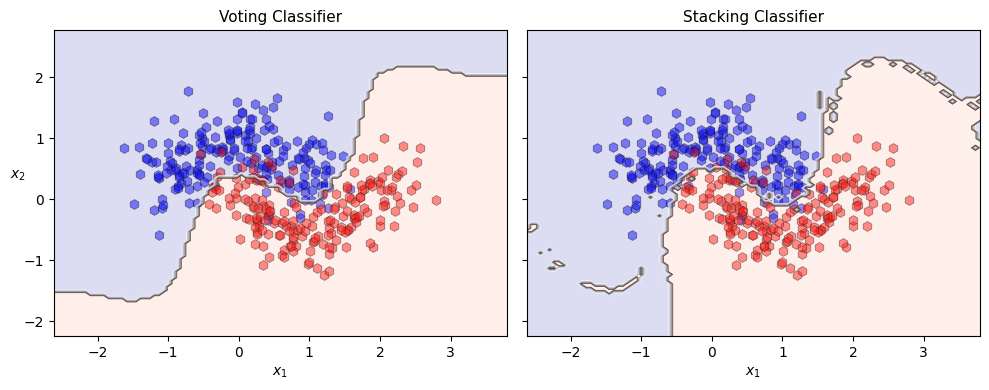

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

custom_cmap = ListedColormap(['#5454C5', '#FFB19B'])

plot_points(X_train, y_train, axes[0], [("h", "blue"), ("h", "red")], ax_labels=[r"$x_1$", r"$x_2$"])
plot_decision_boundary(voting_clf, X_train, y_train, axes[0], custom_cmap)
axes[0].set_title("Voting Classifier", fontsize=11)

plot_points(X_train, y_train, axes[1], [("h", "blue"), ("h", "red")], ax_labels=[r"$x_1$", r"$x_2$"])
plot_decision_boundary(stacking_clf, X_train, y_train, axes[1], custom_cmap)
axes[1].set_title("Stacking Classifier", fontsize=11)

plt.tight_layout()
plt.show()

The decision boundary of the stacking classifier seems quite jaggy and overfit the dataset.